In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('amazon_alexa.tsv', delimiter='\t', encoding='utf-8')

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
df['review'] = df['verified_reviews']
df['review_length'] = df['review'].apply(len)


In [8]:
df = df.drop(['verified_reviews'], axis=1)

In [9]:
df.head()

,rating,date,variation,feedback,review,review_length
0,5,31-Jul-18,Charcoal Fabric,1,Love my Echo!,13
1,5,31-Jul-18,Charcoal Fabric,1,Loved it!,9
2,4,31-Jul-18,Walnut Finish,1,"Sometimes while playing a game, you can answer...",195
3,5,31-Jul-18,Charcoal Fabric,1,I have had a lot of fun with this thing. My 4 ...,172
4,5,31-Jul-18,Charcoal Fabric,1,Music,5


In [10]:
df.dtypes

rating            int64
date             object
variation        object
feedback          int64
review           object
review_length     int64
dtype: object

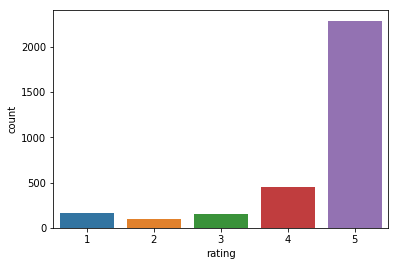

In [11]:
sns.countplot(x='rating',data=df)

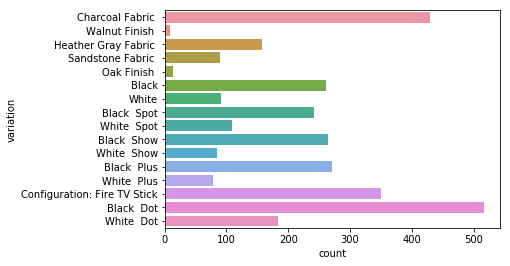

In [12]:
sns.countplot(y='variation', data=df)

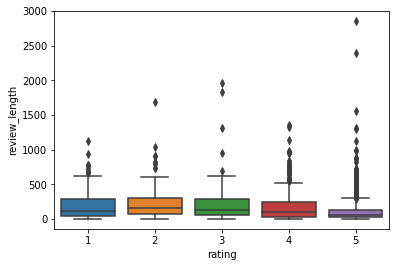

In [13]:
sns.boxplot(x='rating', y= 'review_length', data=df)

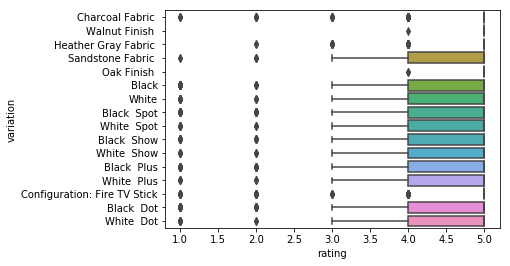

In [14]:
sns.boxplot(x='rating', y= 'variation', data=df)

C:\Users\KiNG\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


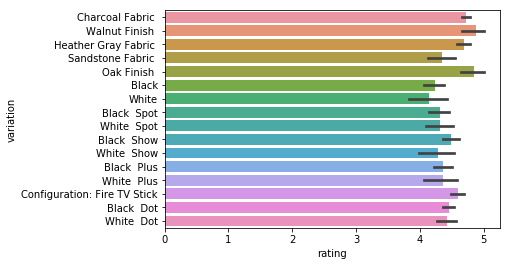

In [20]:
sns.barplot(x='rating', y= 'variation', data=df)

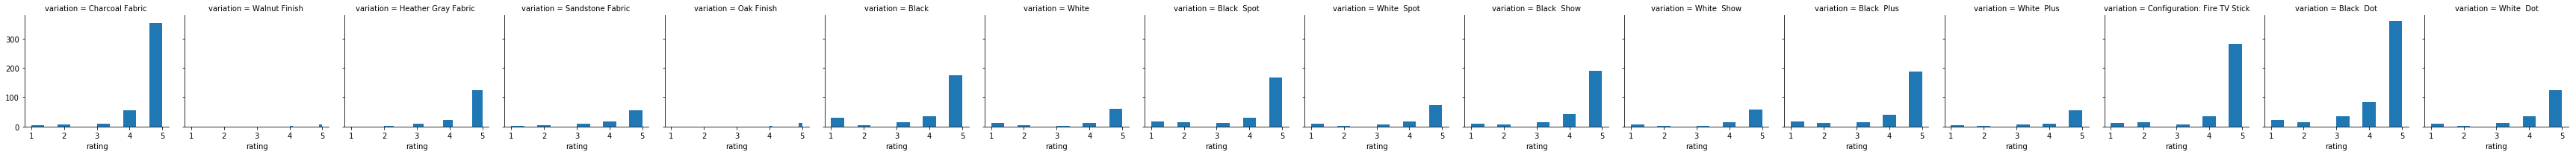

In [18]:
g = sns.FacetGrid(df, col="variation")
g = g.map(plt.hist, "rating")

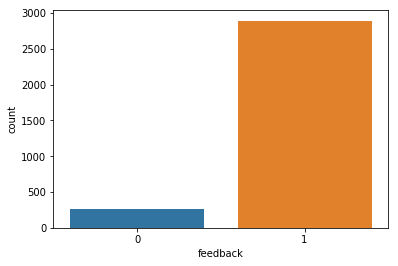

In [25]:
sns.countplot(x= 'feedback', data=df)

In [40]:
fd = df[df['feedback'] == 0].count()

In [41]:
fd.head()

rating       257
date         257
variation    257
feedback     257
review       257
dtype: int64

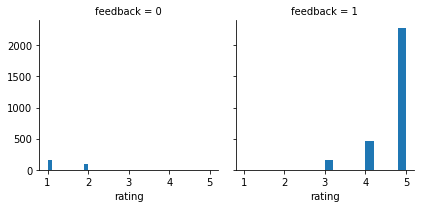

In [57]:
g = sns.FacetGrid(df, col="feedback")
g = g.map(plt.hist, "rating")

In [58]:
df_class = df[(df.rating==1)|(df.rating==5)]

In [59]:
X = df_class['review']
y = df_class['rating']

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [61]:
X = cv.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [64]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [65]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
predictions = nb.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 15  25]
 [  3 692]]


             precision    recall  f1-score   support

          1       0.83      0.38      0.52        40
          5       0.97      1.00      0.98       695

avg / total       0.96      0.96      0.95       735



# Using Text Processing

In [70]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

In [71]:
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()),
])

In [73]:
X = df_class['review']
y = df_class['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [74]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [75]:
predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  0  40]
 [  1 694]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        40
          5       0.95      1.00      0.97       695

avg / total       0.89      0.94      0.92       735

